In [1]:
#%load_ext autoreload
#%autoreload 2
%matplotlib inline
%cd '../HOTS'

/Users/joe/Documents/boulot/git/homhots/HOTS/HOTS


In [2]:
import os
import pickle
import datetime
from Network import *

dataset = 'nmnist'
records_path = '../Records'
timestr = datetime.datetime.now().date().isoformat()
timestr = '2020-12-21'

%mkdir -p ../Records
%mkdir -p ../Records/EXP_03_NMNIST

homeo = True
sigma = None
pooling = False
homeinv = False
jitter = False
tau = 5
nb_train = 500
nb_test = 100
krnlinit = 'first'
nblay = 3
nbclust = 4

homparam = [.25,1]

In [3]:
def makehisto(tau, krnlinit, nblay, nbclust, homeo, homparam, records_path, timestr, dataset, sigma, homeinv, jitter, nb_train, nb_test):
    hotshom = network(krnlinit=krnlinit, tau=tau, nblay=nblay, nbclust=nbclust, homeo=homeo, homparam=homparam, sigma=sigma, homeinv=homeinv, jitter=jitter)
    arch = [hotshom.L[i].kernel.shape[1] for i in range(len(hotshom.L))]
    fname = f'{records_path}/EXP_03_NMNIST/{timestr}_hots_{dataset}_{arch}_{tau}_{homeo}_{homparam}_{sigma}_{homeinv}_{jitter}'
    print(fname)
    if not os.path.isfile(fname+'_model.pkl'):
        loaderhom, order = hotshom.learning1by1(dataset=dataset)
        with open(fname+'_model.pkl', 'wb') as file:
            pickle.dump([hotshom, loaderhom, order], file, pickle.HIGHEST_PROTOCOL)
    else:
        with open(fname+'_model.pkl', 'rb') as file:
            hotshom, loaderhom, order = pickle.load(file)
    hotshom.plotlayer()  
    if not os.path.isfile(fname+f'_histo_{nb_train}_{nb_test}.pkl'):       
        trainmaphom, loaderhom, _ = hotshom.running(loaderhom, order, nb_digit = nb_train)
        testmaphom, loaderhom, _ = hotshom.running(loaderhom, order, nb_digit = nb_test)
        with open(fname+f'_histo_{nb_train}_{nb_test}.pkl', 'wb') as file:
            pickle.dump([trainmaphom, testmaphom], file, pickle.HIGHEST_PROTOCOL)
    else:
        with open(fname+f'_histo_{nb_train}_{nb_test}.pkl', 'rb') as file:
            trainmaphom, testmaphom = pickle.load(file)
    histoscore(trainmaphom,testmaphom)
    return hotshom, loaderhom, order, trainmaphom, testmaphom

# Trying the network without homeostasis

../Records/EXP_03_NMNIST/2020-12-21_hots_nmnist_[4, 8, 16]_5_False_[0.25, 1]_None_False_False
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


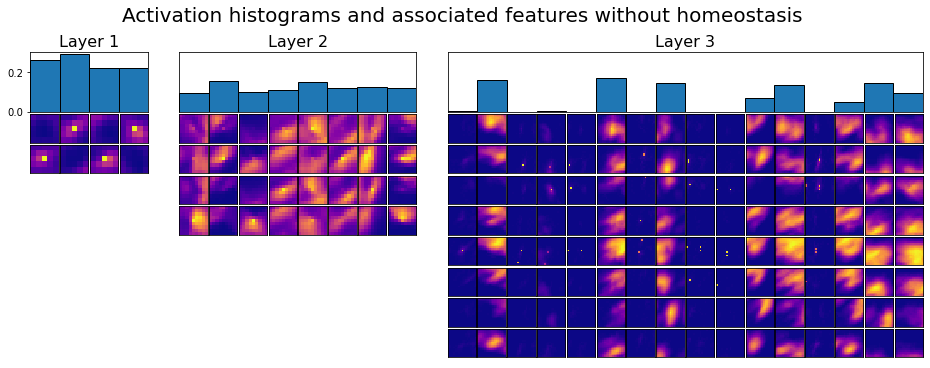

In [ ]:
homeo = False
makehisto(tau, krnlinit, nblay, nbclust, homeo, homparam, records_path, timestr, dataset, sigma, homeinv, jitter, nb_train, nb_test);

# Changing gain fucntion parameters

Gain function is the following: 
$$ \gamma_k = e^{a(nb_{proto})^b(f_k-\frac{1}{nb_{proto}})}$$
where $f_k = \frac{\text{number of activation of prototype k}}{\text{total number of events}}$

In [ ]:
homeo = True
for a in [.125,.25,.5,1,2,4,8]:
    for b in [-2,-1,1,2]:
        homparam = [a,b]
        makehisto(tau, krnlinit, nblay, nbclust, homeo, homparam, records_path, timestr, dataset, sigma, homeinv, jitter, nb_train, nb_test);